In [ ]:
# Movie Ratings Analysis
# ======================
# Author: Your Name
# Date: YYYY-MM-DD

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup styles
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Load data
df = pd.read_csv("movie_ratings.csv")
df.head()


,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


user_id         0
movie_id        0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
year           36
decade         36
genres          0
rating_year     0
dtype: int64

1.

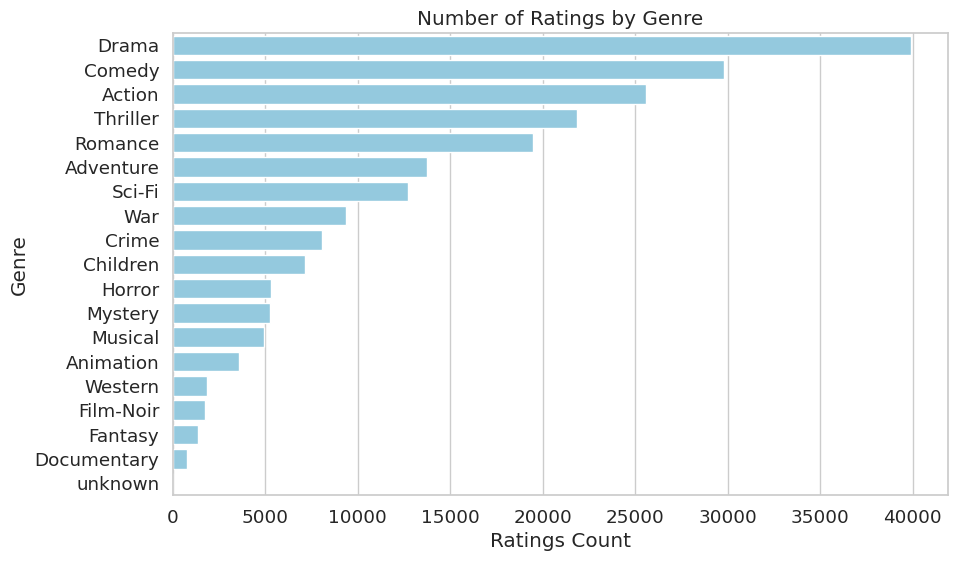

genre
Drama       39895
Comedy      29832
Action      25589
Thriller    21872
Romance     19461
Name: count, dtype: int64

In [4]:
# Split genres into rows
df_genres = df.assign(genre=df['genres'].str.split('|')).explode('genre')

# Count ratings per genre
genre_counts = df_genres['genre'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, color="skyblue")
plt.title("Number of Ratings by Genre")
plt.xlabel("Ratings Count")
plt.ylabel("Genre")
plt.show()

genre_counts.head()


2.

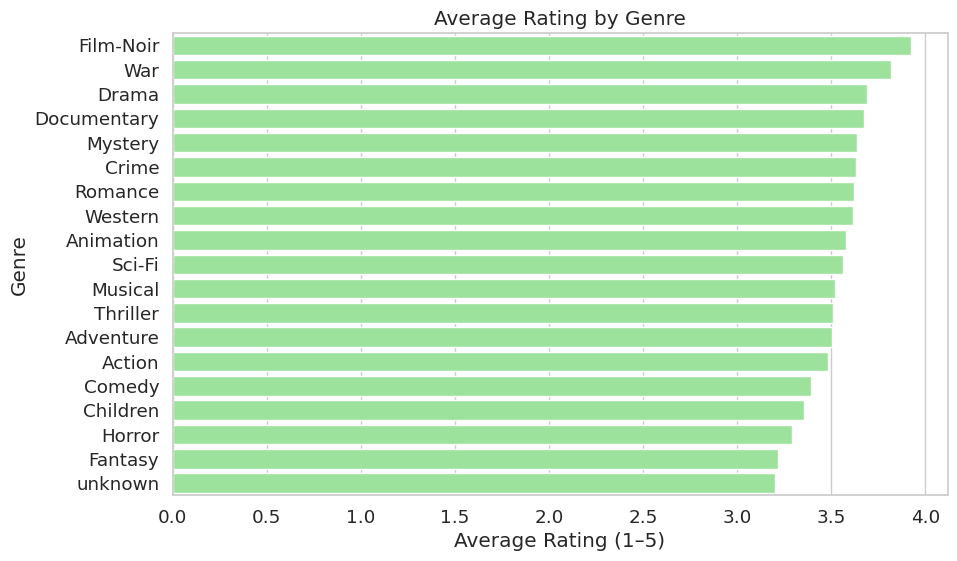

genre
Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Name: rating, dtype: float64

In [5]:
genre_mean_rating = df_genres.groupby("genre")["rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=genre_mean_rating.index, x=genre_mean_rating.values, color="lightgreen")
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating (1–5)")
plt.ylabel("Genre")
plt.show()

genre_mean_rating.head()


3.

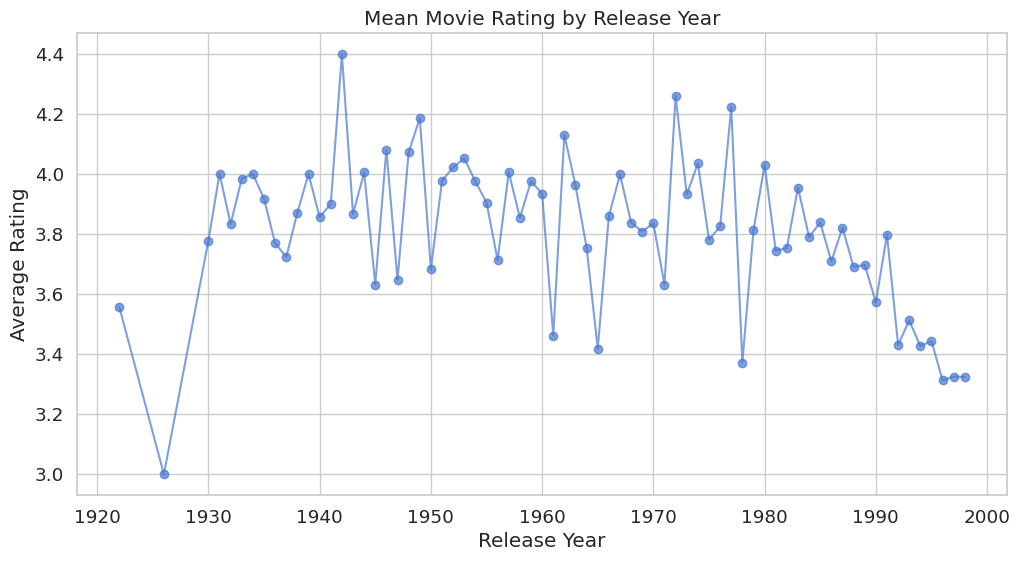

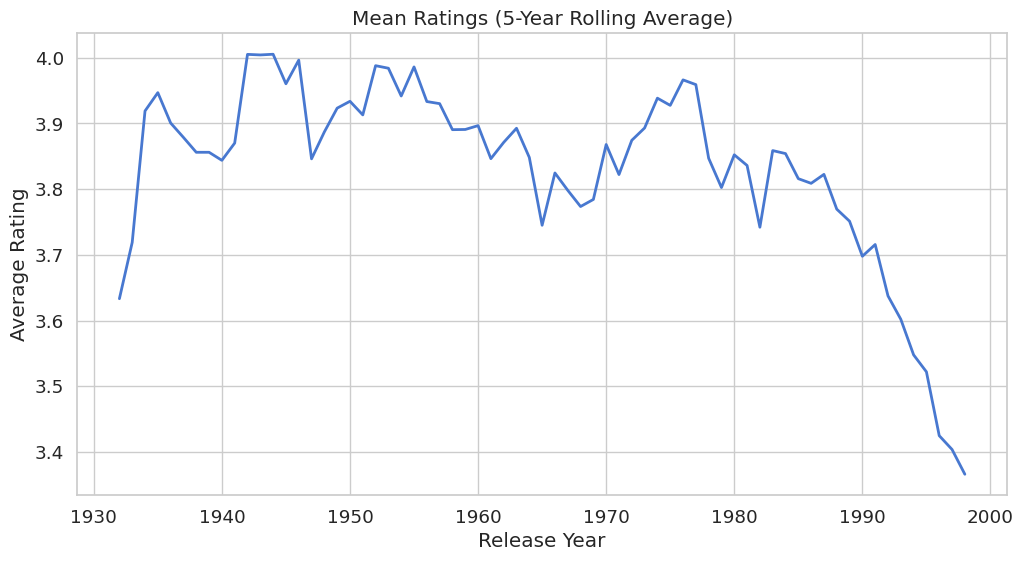

In [6]:
yearly_ratings = df.groupby("year")["rating"].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_ratings.index, yearly_ratings.values, marker="o", alpha=0.7)
plt.title("Mean Movie Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

# Optionally smooth with rolling average
yearly_ratings.rolling(5).mean().plot(figsize=(12,6), linewidth=2)
plt.title("Mean Ratings (5-Year Rolling Average)")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()


4.

In [7]:
movie_stats = df.groupby("title").agg(
    mean_rating=("rating","mean"),
    rating_count=("rating","count")
).reset_index()

best_50 = (movie_stats.query("rating_count >= 50")
           .sort_values("mean_rating", ascending=False)
           .head(5))

best_150 = (movie_stats.query("rating_count >= 150")
            .sort_values("mean_rating", ascending=False)
            .head(5))

print("Top 5 movies (≥ 50 ratings):")
display(best_50)

print("Top 5 movies (≥ 150 ratings):")
display(best_150)


Top 5 movies (≥ 50 ratings):


,title,mean_rating,rating_count
318,"Close Shave, A (1995)",4.491071,336
1281,Schindler's List (1993),4.466443,596
1652,"Wrong Trousers, The (1993)",4.466102,236
273,Casablanca (1942),4.456790,729
1597,Wallace & Gromit: The Best of Aardman Animatio...,4.447761,67


Top 5 movies (≥ 150 ratings):


,title,mean_rating,rating_count
318,"Close Shave, A (1995)",4.491071,336
1281,Schindler's List (1993),4.466443,596
1652,"Wrong Trousers, The (1993)",4.466102,236
273,Casablanca (1942),4.456790,729
1317,"Shawshank Redemption, The (1994)",4.445230,283
